In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm,metrics
from sklearn.preprocessing import StandardScaler

In [35]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2427bae5fad94797b4a197c3c951a1af = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JUSJBF8ITnNKlvAVe_TViHygAwYKI0NoEwF3c7RqwQAu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_2427bae5fad94797b4a197c3c951a1af.get_object(Bucket='breastcancerpredictor-donotdelete-pr-bryuyqtpof8jnk',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave _points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [37]:
data.shape


(569, 32)

In [38]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


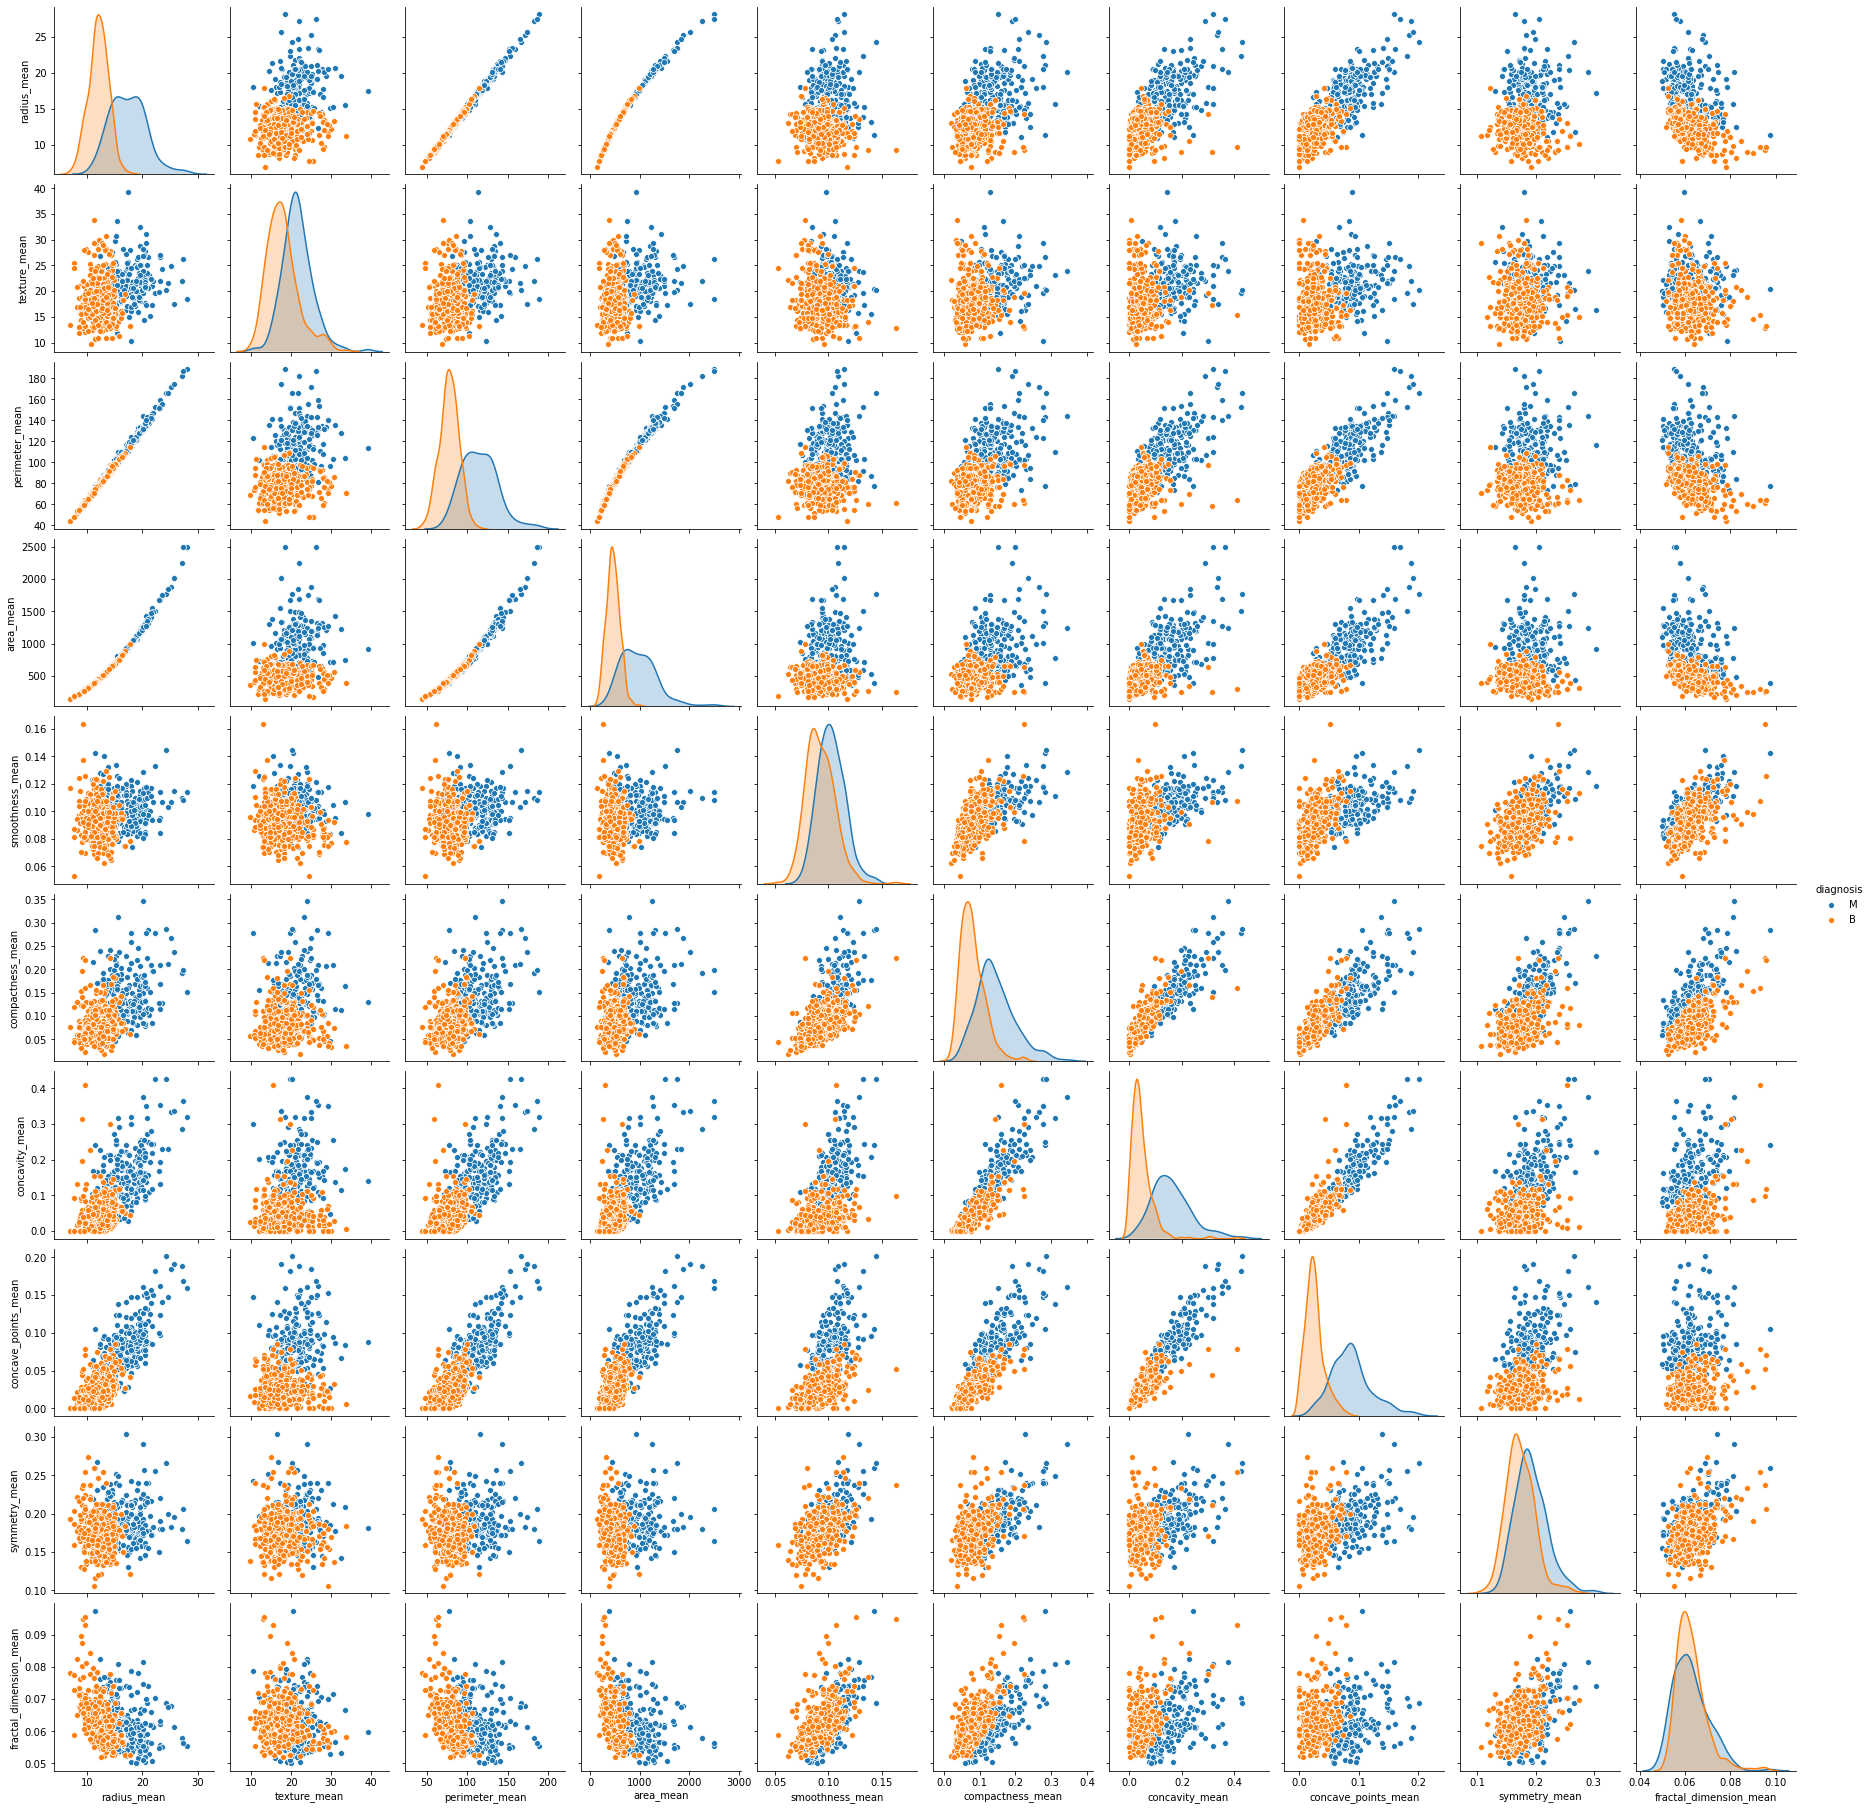

In [6]:
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

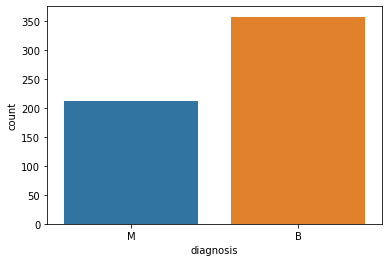

In [39]:
sns.countplot(data['diagnosis'], label = "Count")

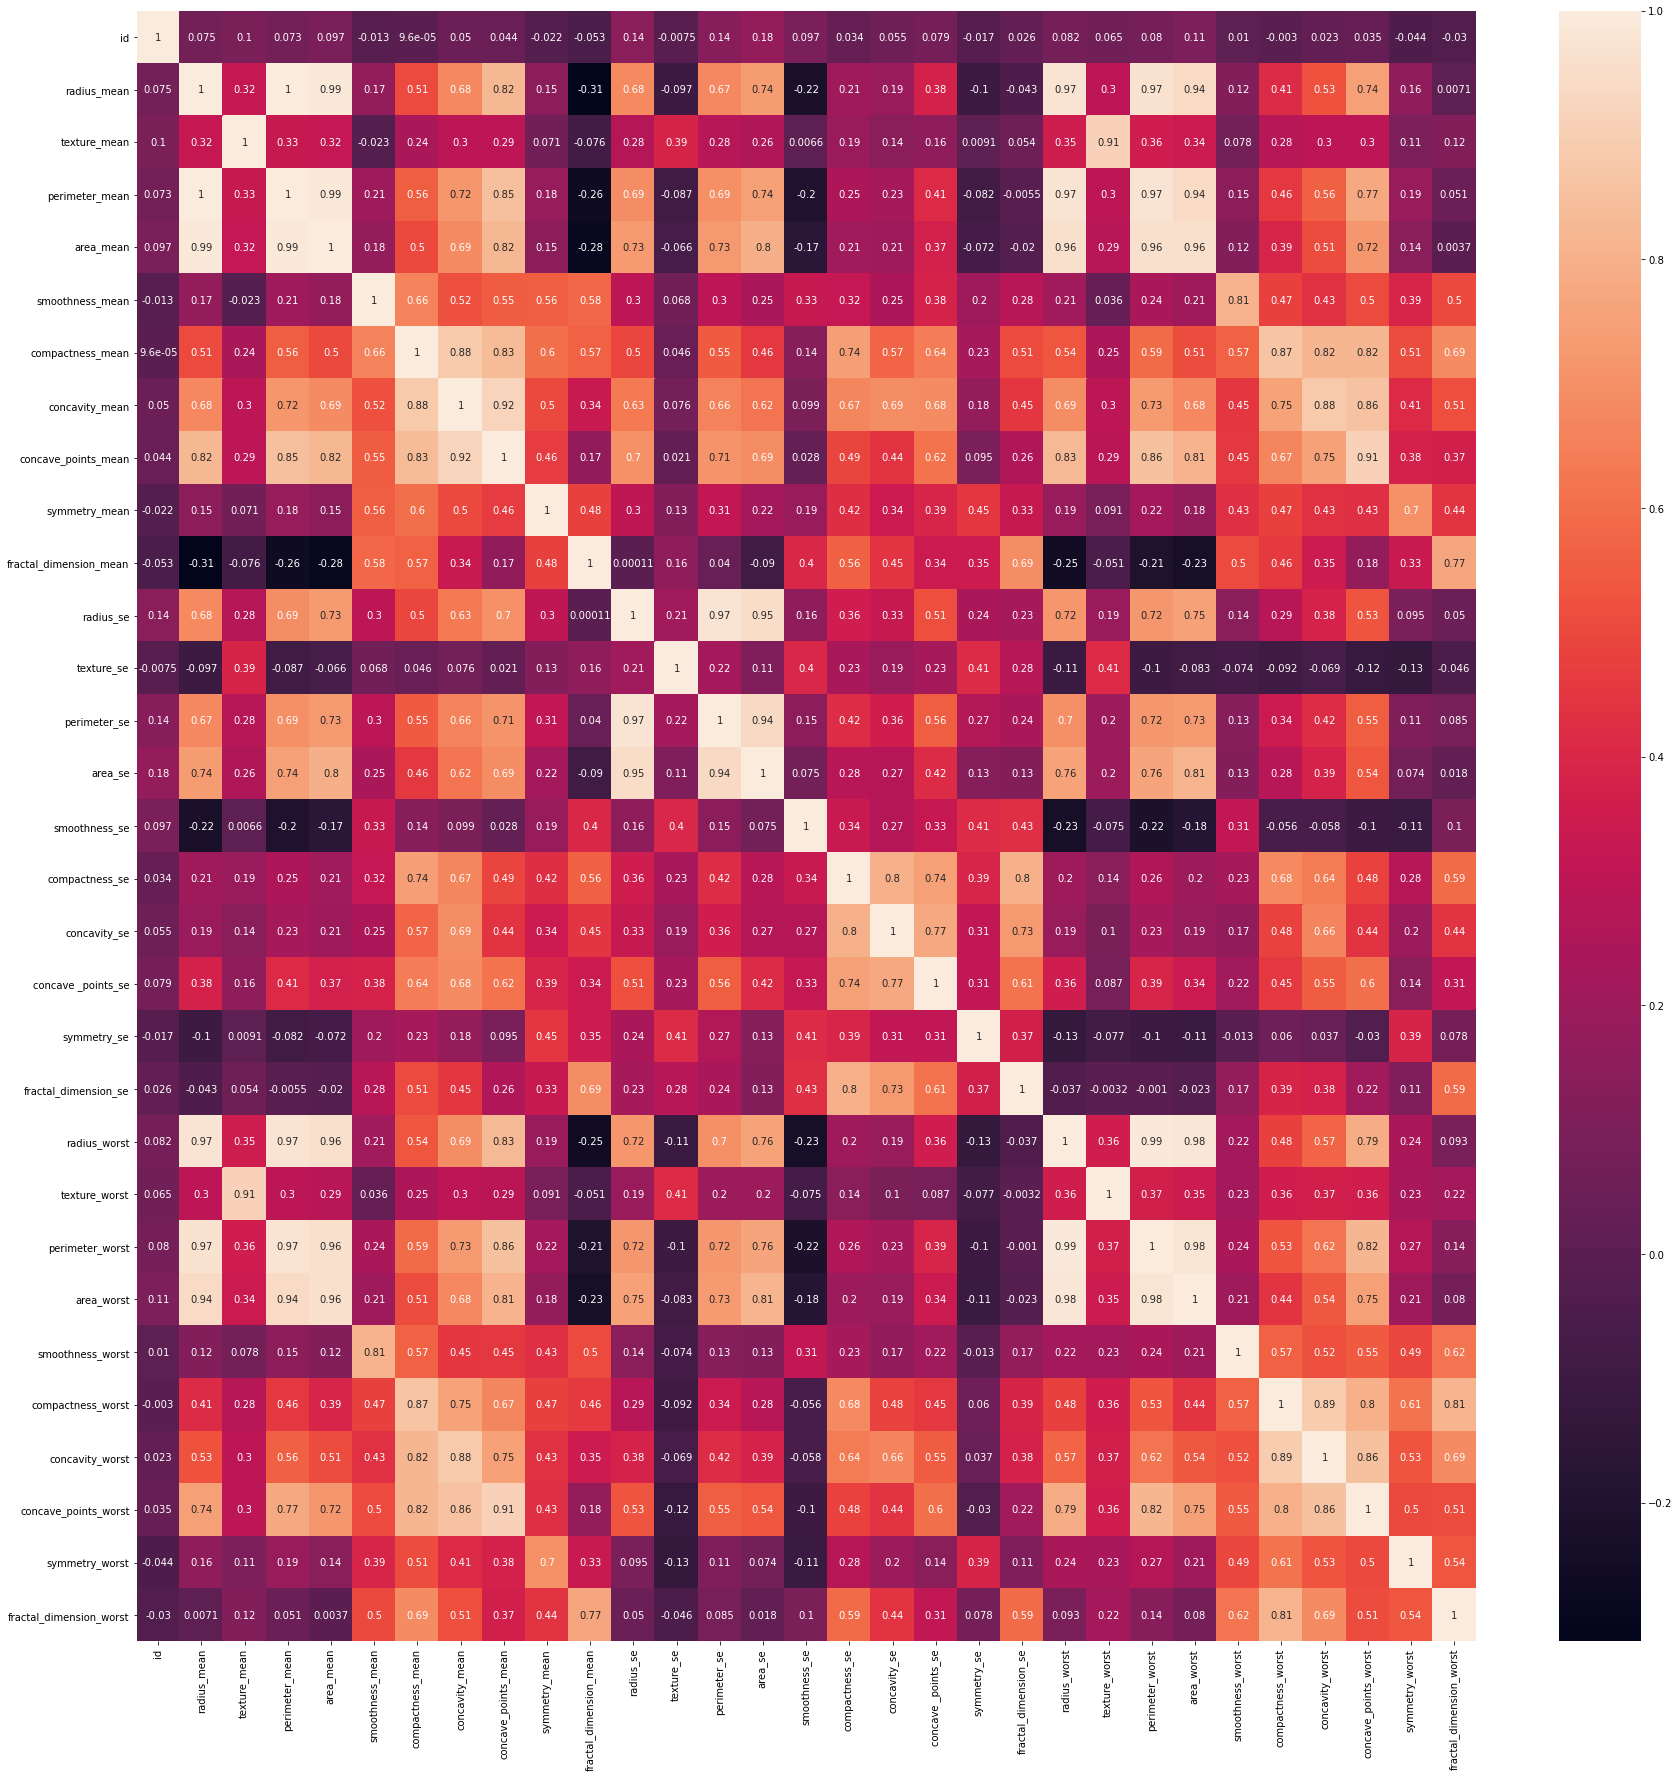

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

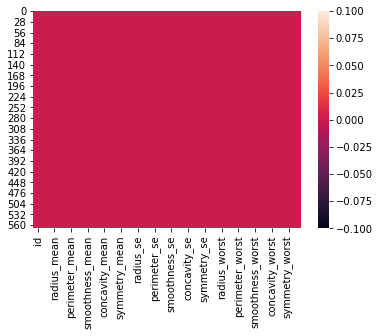

In [41]:
sns.heatmap(data.isnull())

In [42]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave _points_se         False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_w

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [47]:
data.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [48]:
X=data.iloc[:,2:32].values
y=data.iloc[:,1].values
X[0:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [49]:
y=pd.get_dummies(y, drop_first=True)
y

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [59]:
sc=StandardScaler()
X=sc.fit_transform(X)
X[288]

array([-0.81435156,  0.15599529, -0.75168134, -0.74171097, -1.15005355,
        0.2607537 ,  0.04947518,  0.17954815,  2.86008104, -0.06628856,
        0.29389055,  1.24853454,  0.00541602, -0.12446541,  2.89979127,
        3.1936323 ,  1.6278866 ,  3.74280359,  1.65123246,  1.02963652,
       -0.91306618, -0.54507452, -0.86352758, -0.77872567, -1.29616567,
       -0.44507543, -0.56413352, -0.32685754,  0.08775536, -0.76783144])

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,shuffle=True)
y_test

,M
369,1
238,0
320,0
122,1
381,0
...,...
78,1
216,0
288,0
83,1


In [52]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

Confusion matrix:
[[87  2]
 [ 2 52]]


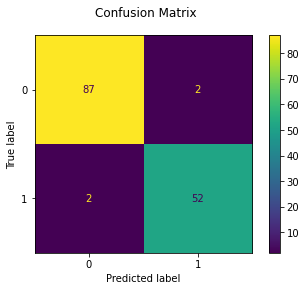

accuracy is  97.2027972027972


In [53]:
predicted = model.predict(X_test)
disp = metrics.plot_confusion_matrix(model, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
accuracy=(disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1])*100/X_test.shape[0]
plt.show()
print("accuracy is ",accuracy)

In [61]:
a=model.predict([[-0.81435156,  0.15599529, -0.75168134, -0.74171097, -1.15005355,
        0.2607537 ,  0.04947518,  0.17954815,  2.86008104, -0.06628856,
        0.29389055,  1.24853454,  0.00541602, -0.12446541,  2.89979127,
        3.1936323 ,  1.6278866 ,  3.74280359,  1.65123246,  1.02963652,
       -0.91306618, -0.54507452, -0.86352758, -0.77872567, -1.29616567,
       -0.44507543, -0.56413352, -0.32685754,  0.08775536, -0.76783144]
])
a

array([0], dtype=uint8)

In [19]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"PnNOdrZO0g5Cx4NEAslOXar9JZp5nxAGAw0fczQH9p81"
                  }

client = APIClient(wml_credentials)

In [20]:
metadata={
    client.spaces.ConfigurationMetaNames.NAME:"Breast cancer predictor",
    client.spaces.ConfigurationMetaNames.STORAGE:{
        "type":"bmcos_object_storage",
        "resource_crn":"crn:v1:bluemix:public:cloud-object-storage:global:a/086dfac8b1094bf3a3aa306b41542aff:2427bae5-fad9-4797-b4a1-97c3c951a1af::"
    },
    client.spaces.ConfigurationMetaNames.COMPUTE:{
        "name":"Machine Learning-y1",
        "crn":"crn:v1:bluemix:public:pm-20:us-south:a/086dfac8b1094bf3a3aa306b41542aff:b1d0f6c7-bf41-4394-a8f0-d296cdad4f68::"
    }
}

In [21]:
space_details=client.spaces.store(meta_props=metadata)

Space has been created. However some background setup activities might still be on-going. Check for 'status' field in the response. It has to show 'active' before space can be used. If its not 'active', you can monitor the state with a call to spaces.get_details(space_id)


In [22]:
space_id=space_details['metadata']['id']

In [23]:
client.set.default_space(space_id)

'SUCCESS'

In [24]:
spec_id=client.software_specifications.get_id_by_name('default_py3.7')
spec_id

'e4429883-c883-42b6-87a8-f419d64088cd'

In [27]:
model_details=client.repository.store_model(model=model,meta_props={
    client.repository.ModelMetaNames.NAME:"breast cancer predictor",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:spec_id,
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23"
})

In [28]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME:"breast cancer predictor",
    client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [29]:
model_id=model_details['metadata']['id']

In [30]:
deployment_details =client.deployments.create(artifact_uid=model_id,meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '0cabd153-83d3-4aa2-a9c4-09032ced63c7' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='df0440dd-422a-4a61-8fd3-8913bfa746ee'
------------------------------------------------------------------------------------------------




In [31]:
deployment_id=deployment_details['metadata']['id']
deployment_id

'df0440dd-422a-4a61-8fd3-8913bfa746ee'

In [32]:
payload={
    client.deployments.ScoringMetaNames.INPUT_DATA:[{
        "fields":['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concavepoints_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
        "values":[[9.755e+00, 2.820e+01, 6.168e+01, 2.909e+02, 7.984e-02, 4.626e-02,
       1.541e-02, 1.043e-02, 1.621e-01, 5.952e-02, 1.781e-01, 1.687e+00,
       1.243e+00, 1.128e+01, 6.588e-03, 1.270e-02, 1.450e-02, 6.104e-03,
       1.574e-02, 2.268e-03, 1.067e+01, 3.692e+01, 6.803e+01, 3.499e+02,
       1.110e-01, 1.109e-01, 7.190e-02, 4.866e-02, 2.321e-01, 7.211e-02]]
    }]
}

In [33]:
client.deployments.score(deployment_id=deployment_id,meta_props=payload)

{'predictions': [{'fields': ['prediction'], 'values': [[1]]}]}